# Team 5 Jupyter notebook - Project 1

## Dependencies

In [91]:
#Dependencies
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import requests
import random
import gmaps
import json
import os
import matplotlib.pyplot as plt

# Import API key
from config import gkey
# Access maps with unique API key
gmaps.configure(api_key=gkey)
#import seaborn as sns; sns.set()

ModuleNotFoundError: No module named 'config'

## Source Files

### + Dataframes creation

In [92]:
#Energy generaton by State from 2017 to 2019
df = pd.read_excel("Resources/Centraleselectricas-2.xlsx")
#df
#Growth indicator by State from 2017 to 2019
b = pd.read_excel("Resources/4_itaee_var_anual_retro2.xlsx")
#b
#Solar irradiation average by State
solar_irradiation= pd.read_excel("Resources/IrradiaciónSolar.xlsx")
#solar_irradiation.head()
#GNP (Gross National Product)
pib_df = pd.read_excel("Resources/PIBE_MX.xlsx")
#pib_df

## Data cleaning

In [93]:
#Clean Data Step 1
col=['No.','Número de identificación del proyecto asignado por el distribuidor','Nivel de tensión en el punto de interconexión'
, 'Número de fases','Área Administrativa del Distribuidor (Division)','Área Administrativa del Distribuidor (Zona)', 'Ubicación por circuito de distribución','Capacidad del circuito de distribución para albergar CE de GD',
    'Ubicación por subestación','Ubicación por Red de Distribución','Ubicación por NodoP','Regímen de contraprestación seleccionado','Estudio de interconexión requerido (Si/No)'
    ]
clean_df= df.drop(columns=col)
clean_df['year']=pd.DatetimeIndex(clean_df['Fecha de Interconexión Física']).year
clean_df_loc = clean_df.loc[clean_df["Estado en que se encuentra la solicitud: Recibida/Atendida/En lista de espera/Cancelada"] == "ATENDIDA"]
clean_df_loc = clean_df_loc.drop(columns = ["Estado en que se encuentra la solicitud: Recibida/Atendida/En lista de espera/Cancelada", "Fecha Solicitud", "Fecha de Interconexión Física", "Municipio"])
clean_df_gp = clean_df_loc.groupby(["year", "Estado", "Tecnología"]).sum()
#clean_df_gp

In [94]:
#Clean Data Step 2
clean_df_gp.reset_index(inplace = True)
clean_df_gp["Capacidad_kW_2017"] = clean_df_gp.loc[clean_df_gp.year == 2017,"Capacidad de la central eléctrica (kW)"]
clean_df_gp["Capacidad_kW_2018"] = clean_df_gp.loc[clean_df_gp.year == 2018,"Capacidad de la central eléctrica (kW)"]
clean_df_gp["Capacidad_kW_2019"] = clean_df_gp.loc[clean_df_gp.year == 2019,"Capacidad de la central eléctrica (kW)"]
#clean_df_gp

In [95]:
#Clean Data Step 3
clean_df_gp.loc[clean_df_gp['Capacidad_kW_2017'].isnull(), 'Capacidad_kW_2017'] = 0
clean_df_gp.loc[clean_df_gp['Capacidad_kW_2018'].isnull(), 'Capacidad_kW_2018'] = 0
clean_df_gp.loc[clean_df_gp['Capacidad_kW_2019'].isnull(), 'Capacidad_kW_2019'] = 0

clean_df_gp = clean_df_gp.groupby('Estado').sum()
clean_df_gp.drop(columns = "year", inplace=True)
clean_df_gp.reset_index(inplace = True)
#clean_df_gp.count()

In [96]:
#Clean Data Step 4
clean_state = b[["Estado","Crecimiento ITAEE 2017", "Crecimiento ITAEE 2018", "Crecimiento ITAEE 2019"]]
#clean_state


In [97]:
#Clean Data Step 5
clean_state.rename(columns = {"Crecimiento ITAEE 2017":"Crecimiento_2017"
                              ,"Crecimiento ITAEE 2018":"Crecimiento_2018"
                               ,"Crecimiento ITAEE 2019":"Crecimiento_2019"},inplace= True)
#clean_state


/Users/jordanvillalobos/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [98]:
#Clean Data Step 6 *new PIB DF

pib_df.rename(columns={2017: "PIB_2017", 2018: "PIB_2018", 2019: "PIB_2019"},inplace=True)

pib_df["Estado"]=pib_df["Estado"].str.replace("Coahuila de Zaragoza","Coahuila")
pib_df["Estado"]=pib_df["Estado"].str.replace("México","Estado de México")
pib_df["Estado"]=pib_df["Estado"].str.replace("Michoacán de Ocampo","Michoacán")
pib_df["Estado"]=pib_df["Estado"].str.replace("Veracruz de Ignacio de la Llave","Veracruz")
#extra correction
pib_df["Estado"]=pib_df["Estado"].str.replace("Ciudad de Estado de México","Ciudad de México")


In [99]:
pib_df.count()
clean_df_gp.count()

Estado                                    32
Capacidad de la central eléctrica (kW)    32
Capacidad_kW_2017                         32
Capacidad_kW_2018                         32
Capacidad_kW_2019                         32
dtype: int64

In [100]:
clean_df_gp["Estado"].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila',
       'Colima', 'Durango', 'Estado de México', 'Guanajuato', 'Guerrero',
       'Hidalgo', 'Jalisco', 'Michoacán', 'Morelos', 'Nayarit',
       'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
       'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas'], dtype=object)

In [101]:
pib_df["Estado"].unique()
df["Estado"].unique()clean_df_gp
solar_irradiation["Estado.1"].unique()

SyntaxError: invalid syntax (<ipython-input-101-4afe621087ad>, line 2)

In [102]:
#Merge Data Step 1
merge_df = pd.merge(clean_df_gp, clean_state, how = "inner", on = "Estado")
group_df = merge_df.groupby("Estado").sum()

#Update now merging with PIB DF
merge_df = pd.merge(clean_df_gp, pib_df, how = "inner", on = "Estado")
#merge_df
group_df

,Capacidad de la central eléctrica (kW),Capacidad_kW_2017,Capacidad_kW_2018,Capacidad_kW_2019,Crecimiento_2017,Crecimiento_2018,Crecimiento_2019
Estado,,,,,,,
Aguascalientes,12519.23,5322.08,3963.01,3234.14,2.459206,3.727672,-0.031717
Baja California,18114.67,5689.40,9425.13,3000.14,3.358687,2.284226,2.052373
Baja California Sur,6770.02,2853.31,3393.81,522.90,10.708411,16.815057,-7.103514
Campeche,3583.71,998.20,2389.27,196.24,-10.446591,-1.422752,-2.153711
Chiapas,3296.86,1644.83,1257.89,394.14,-3.327992,-2.138943,-2.460577
Chihuahua,40649.46,13138.94,15826.16,11684.36,3.307919,1.956625,2.079865
Ciudad de México,57968.76,25371.71,29826.01,2771.04,3.001314,2.690299,-0.309418
Colima,7672.50,3017.00,3179.64,1475.86,3.485108,2.503819,4.320531
Durango,8733.43,2462.20,2931.02,3340.21,-0.269926,1.451128,0.600691


In [103]:
#Clean Data Step 7
solar_irradiation_clean=solar_irradiation.drop(columns=["Estado"])
#solar_irradiation_clean
solar_irradiation_clean=solar_irradiation_clean.rename(columns={"Estado.1":"Estado"})
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("Yucatan","Yucatán")
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("Nuevo Leon","Nuevo León")
##
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("D.F.","Ciudad de México")
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("San Luis Potosi","San Luis Potosí")
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("Mexico","Estado de México")
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("Michoacan","Michoacán")
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("Queretaro","Querétaro")

##
#solar_irradiation_clean


In [104]:
avg_solar=solar_irradiation_clean.drop(columns=["Ciudad","Ene","Feb","Mar","Abr","May","Jun","Jul","Agos","Sept","Oct","Nov","Dic","Min","Max"])

#solar_irradiation_clean.groupby("Estado").sum()
solar_irradiaton_df = avg_solar.groupby("Estado").mean()
solar_irradiaton_df.reset_index(inplace = True)
#solar_irradiaton_df
#avg_solar




In [105]:
#Merge Data Step 2
grouped_df=pd.merge(merge_df,solar_irradiaton_df,how="left",on="Estado")
grouped_df.rename(columns = {"Medida":"Radiacion"},inplace= True)
grouped_df.loc[grouped_df['Radiacion'].isnull(), 'Radiacion'] = 0
grouped_df

,Estado,Capacidad de la central eléctrica (kW),Capacidad_kW_2017,Capacidad_kW_2018,Capacidad_kW_2019,PIB_2017,PIB_2018,PIB_2019,Radiacion
0,Aguascalientes,12519.23,5322.08,3963.01,3234.14,211672.469,216705.560,224807.469,5.600000
1,Baja California,18114.67,5689.40,9425.13,3000.14,535552.651,553327.213,565895.378,5.500000
2,Baja California Sur,6770.02,2853.31,3393.81,522.90,133948.675,148376.630,173047.360,6.150000
3,Campeche,3583.71,998.20,2389.27,196.24,600612.272,537882.577,529584.304,5.200000
4,Chiapas,3296.86,1644.83,1257.89,394.14,287034.269,277580.835,271621.449,4.760000
5,Chihuahua,40649.46,13138.94,15826.16,11684.36,534205.546,551497.303,562599.228,6.333333
6,Ciudad de México,57968.76,25371.71,29826.01,2771.04,2957233.594,3045539.859,3128247.710,5.300000
7,Coahuila,21595.53,7789.15,7871.55,5934.83,572243.615,601722.052,609051.269,4.650000
8,Colima,7672.50,3017.00,3179.64,1475.86,98576.211,102039.429,104474.901,4.900000
9,Durango,8733.43,2462.20,2931.02,3340.21,200660.962,199559.310,202546.990,5.700000


## Data Analysis 1

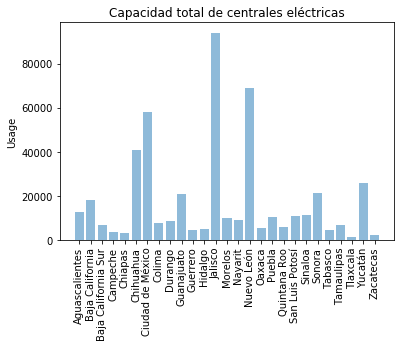

In [106]:
group_df = group_df.reset_index()
y_pos = np.arange(len(group_df))
plt.bar(y_pos, group_df['Capacidad de la central eléctrica (kW)'], align='center', alpha=0.5)
plt.xticks(y_pos, group_df['Estado'], rotation = 90)
plt.ylabel('Usage')
plt.title('Capacidad total de centrales eléctricas')
x = group_df.sort_values(by=['Capacidad de la central eléctrica (kW)'], ascending=False)
x[['Estado','Capacidad de la central eléctrica (kW)']].reset_index(drop=True,).head(5)
plt.savefig("Capacidad total de centrales eléctricas")

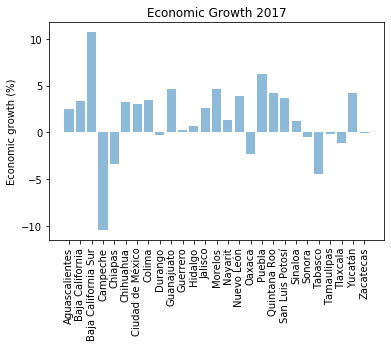

In [107]:
y_pos = np.arange(len(group_df))
plt.bar(y_pos, group_df['Crecimiento_2017'], align='center', alpha=0.5)
plt.xticks(y_pos, group_df['Estado'], rotation = 90)
plt.ylabel('Economic growth (%)')
plt.title('Economic Growth 2017')
x = group_df.sort_values(by=['Crecimiento_2017'], ascending=False)
x[['Estado','Crecimiento_2017']].reset_index(drop=True,).head(5)
plt.savefig("Economic Growth 2017")

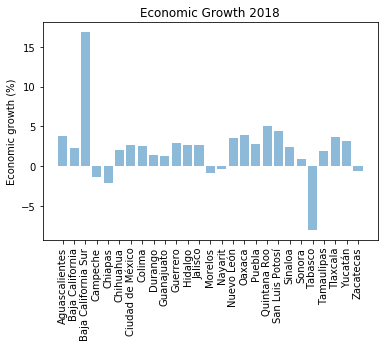

In [108]:
y_pos = np.arange(len(group_df))
plt.bar(y_pos, group_df['Crecimiento_2018'], align='center', alpha=0.5)
plt.xticks(y_pos, group_df['Estado'], rotation = 90)
plt.ylabel('Economic growth (%)')
plt.title('Economic Growth 2018')
x = group_df.sort_values(by=['Crecimiento_2018'], ascending=False)
x[['Estado','Crecimiento_2018']].head(5)
plt.savefig("Economic Growth 2018")

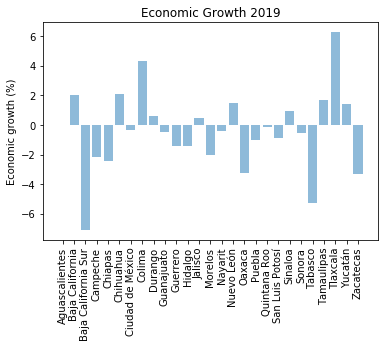

In [109]:
y_pos = np.arange(len(group_df))
plt.bar(y_pos, group_df['Crecimiento_2019'], align='center', alpha=0.5)
plt.xticks(y_pos, group_df['Estado'], rotation = 90)
plt.ylabel('Economic growth (%)')
plt.title('Economic Growth 2019')
x = group_df.sort_values(by=['Crecimiento_2019'], ascending=False)
x[['Estado','Crecimiento_2019']].reset_index(drop=True,).head(5)
plt.savefig("Economic Growth 2019")

In [110]:
import scipy.stats as st
from scipy.stats import linregress

The correlation between both factors is 0.3


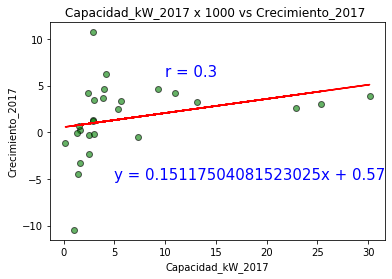

The correlation between both factors is 0.07


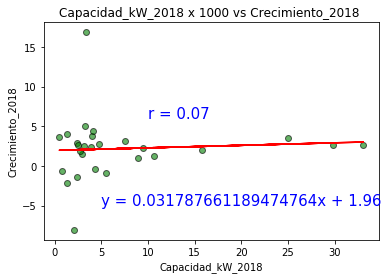

The correlation between both factors is 0.21


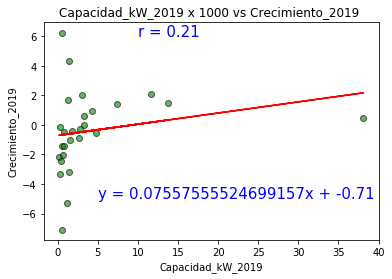

In [123]:
w = 2
e = 5
while w < 5:
    x_values = group_df.iloc[:,w]/1000
    y_values = group_df.iloc[:,e]
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(slope) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,marker="o",facecolors="green", edgecolors="black", alpha=0.60)
    plt.title(f'{group_df.columns[w]} x 1000 vs {group_df.columns[e]} ')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5,-5),fontsize=15,color="blue")
    plt.annotate(f"r = {round(correlation[0],2)}", (10,6),fontsize=15,color="blue")
    plt.xlabel(group_df.columns[w])
    plt.ylabel(group_df.columns[e])
    plt.savefig(f'{group_df.columns[w]} x 1000 vs {group_df.columns[e]} ')
    plt.show()
    w = w+1
    e = e+1

The correlation between both factors is 0.77


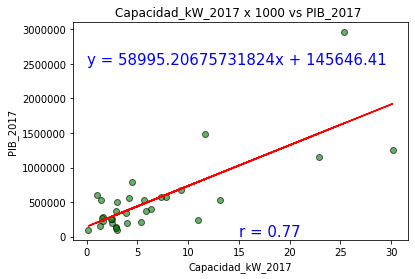

The correlation between both factors is 0.79


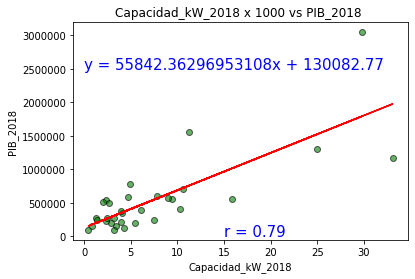

The correlation between both factors is 0.29


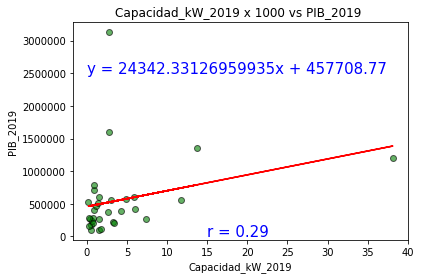

In [121]:
w = 2
e = 5
while w < 5:
    x_values = grouped_df.iloc[:,w]/1000
    y_values = grouped_df.iloc[:,e]
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(slope) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,marker="o",facecolors="green", edgecolors="black", alpha=0.60)
    plt.title(f'{grouped_df.columns[w]} x 1000 vs {grouped_df.columns[e]} ')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,2500000),fontsize=15,color="blue")
    plt.annotate(f"r = {round(correlation[0],2)}", (15,10),fontsize=15,color="blue")
    plt.xlabel(grouped_df.columns[w])
    plt.ylabel(grouped_df.columns[e])
    plt.savefig(f'{grouped_df.columns[w]} x 1000 vs {grouped_df.columns[e]} ')
    plt.show()
    w = w+1
    e = e+1

## Data Analysis 2

In [76]:
capacity_df = grouped_df[["Estado", "Capacidad_kW_2017", "Capacidad_kW_2018", "Capacidad_kW_2019"]]
#capacity_df
top_capacity = capacity_df.nlargest(5, ["Capacidad_kW_2017", "Capacidad_kW_2018", "Capacidad_kW_2019"])
top_capacity

,Estado,Capacidad_kW_2017,Capacidad_kW_2018,Capacidad_kW_2019
18,Nuevo León,30132.53,25016.08,13726.16
6,Ciudad de México,25371.71,29826.01,2771.04
14,Jalisco,22844.92,33073.05,38105.81
5,Chihuahua,13138.94,15826.16,11684.36
10,Estado de México,11657.07,11285.31,2712.09


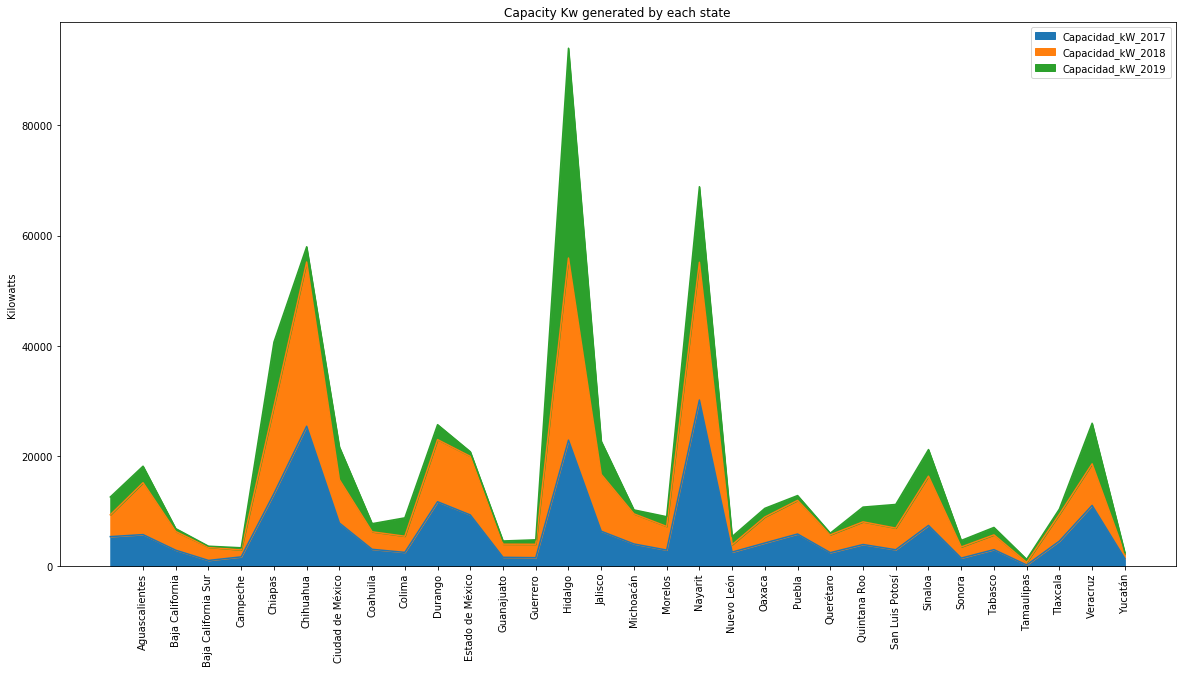

In [77]:
#Area plot to show growth
ax = capacity_df.plot.area(figsize=(20,10))

ax.set_title("Capacity Kw generated by each state")
ax.set_xticklabels(capacity_df.Estado,rotation=90, minor=False)
ax.set_xticks(range(1,32)) 
ax.set_ylabel("Kilowatts")
ax

In [78]:
top_PIBE = pib_df.nlargest(5, ["PIB_2017", "PIB_2018", "PIB_2019"])
top_PIBE

,Estado,PIB_2017,PIB_2018,PIB_2019
8,Ciudad de México,2957233.594,3045539.859,3128247.710
14,Estado de México,1485467.443,1556925.971,1605830.823
18,Nuevo León,1257648.421,1306549.097,1353874.513
13,Jalisco,1149129.548,1176616.034,1207897.462
29,Veracruz,784930.108,776072.856,794376.310


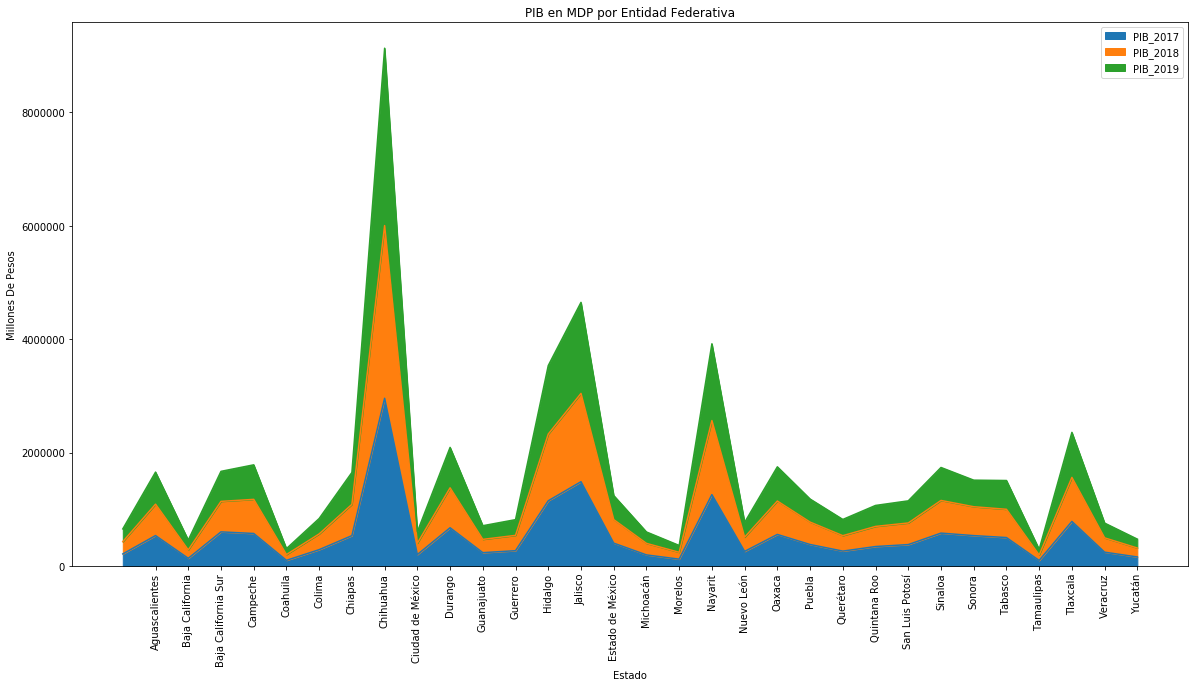

In [79]:
plt = pib_df.plot.area(figsize=(20,10))

plt.set_title('PIB en MDP por Entidad Federativa')
plt.set_xlabel('Estado')
plt.set_ylabel('Millones De Pesos')
plt.set_xticklabels(pib_df.Estado,rotation=90, )
plt.set_xticks(range(1,32)) 
# Show graphic
plt
# Save plot
#plt.savefig("Output Data/PIB en MDP vs. año")


## API Google maps requests

### Getting Latitude and Longitud for each State

In [18]:
grouped_df['Lat'] = ""
grouped_df['Lng'] = ""
#group_df.reset_index(inplace = True)
#group_df
#for index, row in group_df.iterrows():
# create a params dict that will be updated with new city each iteration
params = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in grouped_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    state = row['Estado']

    # update address key value
    params['address'] = f"{state},Mexico"

    # make request
    states_lat_lng = requests.get(base_url, params=params)
    
        
    # convert to json
    states_lat_lng = states_lat_lng.json()

    grouped_df.loc[index, "Lat"] = states_lat_lng["results"][0]["geometry"]["location"]["lat"]
    grouped_df.loc[index, "Lng"] = states_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
#grouped_df
#  

NameError: name 'grouped_df' is not defined

## Heatmap showing Total electric capacity for State

In [19]:
# Store 'Lat' and 'Lng' into  locations 
locations = grouped_df[["Lat", "Lng"]].astype(float)
capacidad_instalada = grouped_df["Capacidad de la central eléctrica (kW)"].astype(float)

print(len(locations),len(capacidad_instalada))
# Create a Humidity layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=capacidad_instalada/1000, 
                                 dissipating=False, max_intensity=10,
                                 point_radius = .5)

fig.add_layer(heat_layer)


fig

NameError: name 'grouped_df' is not defined

In [20]:
info_box_template = """
<dl>
<dt>State</dt><dd>{Estado}</dd>
<dt>Electric capactiy (Kw)</dt><dd>{Capacidad_kW_2019}</dd>
<dt>PIB (MDP) $</dt><dd>{PIB_2019}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
analysis_info = [info_box_template.format(**row) for index, row in grouped_df.iterrows()]

NameError: name 'grouped_df' is not defined

In [21]:
# Create PIB symbol layer
PIB_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content= analysis_info
)


fig = gmaps.figure()
fig.add_layer(PIB_layer)

fig

NameError: name 'locations' is not defined

In [22]:
# Create a combined map
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(PIB_layer)

fig

NameError: name 'heat_layer' is not defined

## Heatmap showing average solar radiation for State

In [23]:
# Store 'Lat' and 'Lng' into  locations 
locations = grouped_df[["Lat", "Lng"]].astype(float)
actividad_solar = grouped_df["Radiacion"].astype(float)

print(len(locations),len(actividad_solar))
# Create a Humidity layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=actividad_solar, 
                                 dissipating=False, max_intensity=10,
                                 point_radius = 2
                                )
heat_layer.gradient = [ 'blue','red']
fig.add_layer(heat_layer)


fig

NameError: name 'grouped_df' is not defined